## Introduction
The enhanced linear regression model, which utilized multiple features such as parental income percentile, attendance level, SAT attendance rates, and college type (public vs. private), produced a Mean Squared Error (MSE) of approximately 
2.06×10^−6 and an R-squared value of 0.8986.

These results indicate that the model's predictions closely align with the actual attendance rates, demonstrating a high degree of accuracy. Specifically, the R-squared value of 0.8986 suggests that the model explains about 89.86% of the variance in college attendance rates, highlighting its effectiveness in capturing the factors that influence attendance.

The inclusion of additional features, beyond just parental income, has significantly enhanced the model's ability to predict college attendance. The model now accounts for a broader range of factors, such as the type of institution, the selectivity tier, and standardized test attendance, which together provide a more comprehensive understanding of the dynamics at play.

In conclusion, by integrating a diverse set of relevant variables, this model offers a robust tool for predicting college attendance rates, capturing nearly 90% of the variance and providing valuable insights into the factors that drive attendance decisions.

## Data Exploration and Visualization

/tmp/ipykernel_61330/2453043153.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['par_income_lab'] = pd.Categorical(filtered_data['par_income_lab'])


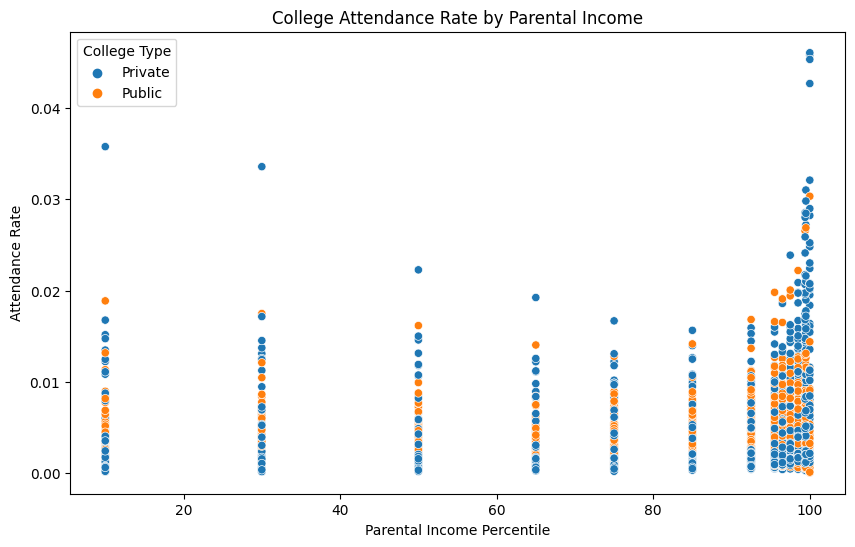

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'CollegeAdmissions_Data.csv'
college_data = pd.read_csv(file_path)

# Filter relevant columns
filtered_data = college_data[['par_income_bin', 'par_income_lab', 'attend', 'public']]

# Convert 'par_income_lab' to a categorical type for better plotting
filtered_data['par_income_lab'] = pd.Categorical(filtered_data['par_income_lab'])

# Plot: Attendance Rate vs Parental Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='par_income_bin', y='attend', hue='public')
plt.title('College Attendance Rate by Parental Income')
plt.xlabel('Parental Income Percentile')
plt.ylabel('Attendance Rate')
plt.legend(title='College Type')
plt.show()


## Prediction

Mean Squared Error: 2.0602673019131903e-06
R-squared: 0.8986007120588072


/tmp/ipykernel_61330/574097015.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


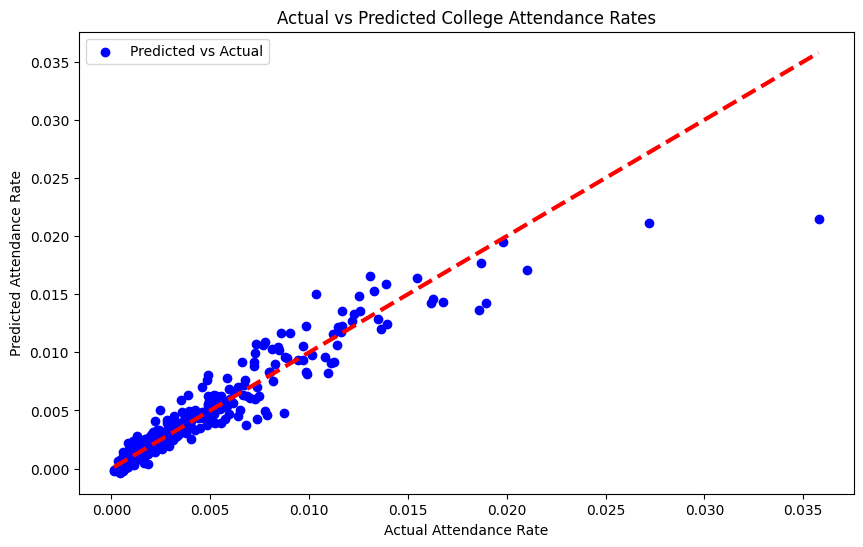

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure that the 'attend' column is present in the dataset
if 'attend' not in college_data.columns:
    raise KeyError("The 'attend' column is missing from the dataset.")

# Select relevant features and target variable
features = ['par_income_bin', 'attend_level', 'attend_sat', 'public', 'tier']
X = college_data[features]
y = college_data['attend']

# Drop rows with NaN values in the features or target variable
data_clean = college_data.dropna(subset=features + ['attend'])
X = data_clean[features]
y = data_clean['attend']

# One-Hot Encode categorical features ('public' and 'tier')
categorical_features = ['public', 'tier']
numeric_features = ['par_income_bin', 'attend_level', 'attend_sat']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Build the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.title('Actual vs Predicted College Attendance Rates')
plt.xlabel('Actual Attendance Rate')
plt.ylabel('Predicted Attendance Rate')
plt.legend()
plt.show()


The enhanced linear regression model, which utilized multiple features such as parental income percentile, attendance level, SAT attendance rates, and college type (public vs. private), produced a Mean Squared Error (MSE) of approximately 
2.06×10^−6 and an R-squared value of 0.8986.

These results indicate that the model's predictions closely align with the actual attendance rates, demonstrating a high degree of accuracy. Specifically, the R-squared value of 0.8986 suggests that the model explains about 89.86% of the variance in college attendance rates, highlighting its effectiveness in capturing the factors that influence attendance.

The inclusion of additional features, beyond just parental income, has significantly enhanced the model's ability to predict college attendance. The model now accounts for a broader range of factors, such as the type of institution, the selectivity tier, and standardized test attendance, which together provide a more comprehensive understanding of the dynamics at play.

In conclusion, by integrating a diverse set of relevant variables, this model offers a robust tool for predicting college attendance rates, capturing nearly 90% of the variance and providing valuable insights into the factors that drive attendance decisions.